## Atividade 3 - Seleção de Modelos com Teste-T
#
### Caio Eduardo Theodoro - RA: 2044560



| Biblioteca | Função |
| ------ | ----------- |
| numpy   | será utilizada para realizar operações matemáticas |
| pandas  | será utilizada para ler os arquivos csv |
| matplotlib.pyplot e seaborn | será utilizada para plotar os gráficos |
| sklearn | será utilizada para realizar a separação dos dados em treino e teste, e para realizar a classificação dos dados |
| do_cv e rejeitar_hip_nula | serão utilizadas para realizar o teste-t e validação cruzada |

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from utils import do_cv, rejeitar_hip_nula
%matplotlib inline

## Leitura do dataset

In [29]:
colunas = ['PC 0', 'PC 1']
plt.tight_layout()
df = pd.read_csv('mini_mnist.csv')



<Figure size 640x480 with 0 Axes>

In [30]:
df.head(4) #vizualizando o conjunto de atributos

pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   

   pixel_8  pixel_9  ...  pixel_775  pixel_776  pixel_777  pixel_778  \
0        0        0  ...          0          0          0          0   
1        0        0  ...          0          0          0          0   
2        0        0  ...          0          0          0          0   
3        0        0  ...          0          0          0          0   

   pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  digito  
0          0          0          0          0          0       7  
1          0          0          0          0          0       8  
2          0          0          0          0          0       2  
3          0          0          0          0          0       9  

[4 rows x 785 columns]

# Separando os valores de classes em X (features) e y (target)


In [31]:

#Atributo de saída
y = df['digito'].values.ravel()

#Atributos de entrada
X = df.drop('digito', axis=1)

## PCA

### Como o dataset possui 785 colunas, será utilizado o PCA para reduzir a dimensionalidade dos dados, como fim de melhorar o desempenho dos modelos.

In [32]:
pca = PCA(n_components=2) #reduzindo a dimensionalidade para 2
X_pca_2 = pca.fit_transform(X)

X_pca_2.shape
 
        



(1500, 2)

### Como mostrado acima, após a redução de dimensionalidade, o dataset passa a ter o formato 1500,2 (1500 linhas e 2 colunas).

### Feito isso, devemos criar novamente o dataframe, visto que o PCA retorna um array numpy.

In [33]:

X_pca_2 = pd.DataFrame(X_pca_2, columns=colunas) # Transformando em DataFrame
X_pca_2.shape, y.shape # Verificando o shape dos dados  

((1500, 2), (1500,))

### Após isso, é possível plotar o gráfico de dispersão dos dados, como mostrado abaixo.



<Axes: xlabel='PC 0', ylabel='PC 1'>

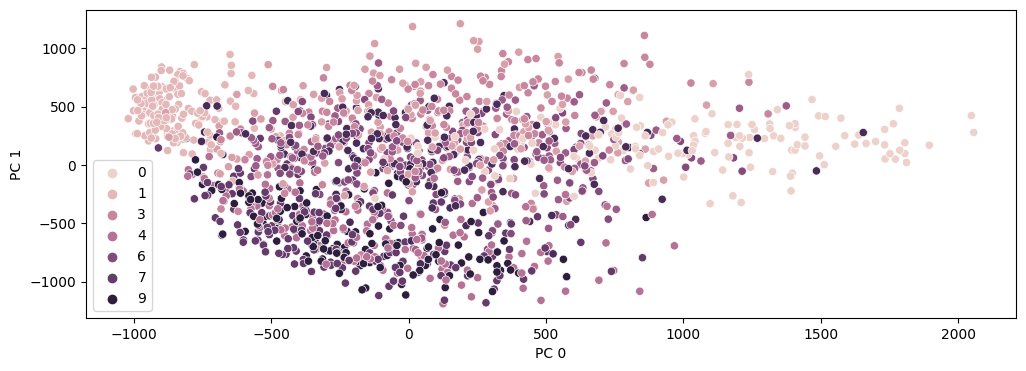

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

sns.scatterplot(x='PC 0', y='PC 1', hue=y, data=X_pca_2, ax=ax)


### Classificação dos dados utilizando o KNN e SVM em validação cruzada em 10 vias e normalização dos dados de cada partição separadamente


Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

Text(0, 0.5, 'Frequência')

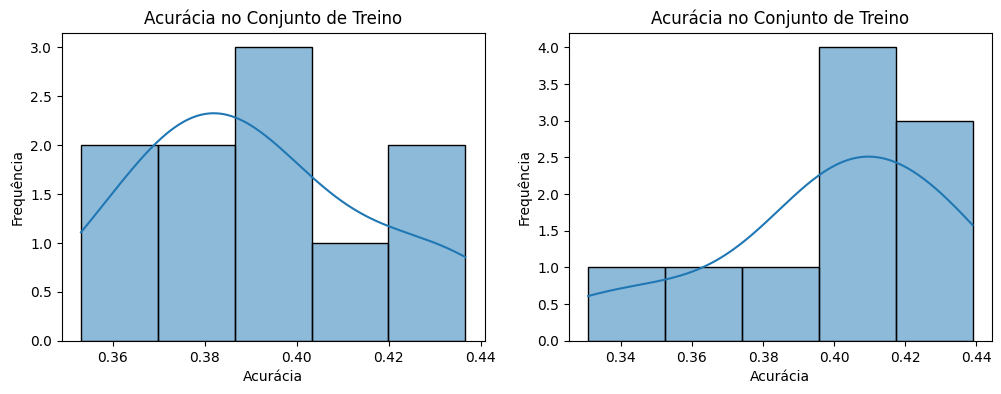

In [35]:
def get_acc(param_grid_knn, param_grid_svc):
    knn_acc = do_cv(KNeighborsClassifier, X_pca_2.values, y, 10, 10, n_jobs=10, scale=True, params=param_grid_knn) #realiza a validação cruzada para o KNN
    svc_acc = do_cv(SVC, X_pca_2.values, y, 10, 10, n_jobs=10, scale=True, params=param_grid_svc) #realiza a validação cruzada para o SVM
    return knn_acc, svc_acc #retorna os valores de acurácia para o KNN e SVM

def plot_knn_k_acc(ks, acuracias, label=''):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(ks, acuracias)
    ax.set_xticks(ks)
    ax.set_xlabel('k')
    ax.set_ylabel('Acurácia')
    ax.set_title('Acurácia no Conjunto de %s' % (label))
    fig.tight_layout()
    plt.show()



param_grid_knn = {'n_neighbors' : range(1,30,2)} #parametros para o KNN (valores de 1 a 30 com passo de 2)
param_grid_svc = {'C' : [1, 10, 100, 1000], 'gamma' : ['auto', 'scale']} #parametros para o SVM 


knn_acc, svc_acc = get_acc(param_grid_knn, param_grid_svc) #retorna os valores de acurácia para o KNN e SVM


fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(svc_acc, label='SVM',kde=True, ax=ax[1])
ax[0].set_title('Acurácia no Conjunto de Treino')
ax[0].set_xlabel('Acurácia')
ax[0].set_ylabel('Frequência')

sns.histplot(knn_acc, label='KNN',kde=True, ax=ax[0])
ax[1].set_title('Acurácia no Conjunto de Treino')
ax[1].set_xlabel('Acurácia')
ax[1].set_ylabel('Frequência')

## Valores obtidos
### Abaixo, podemos ver que a acurácia do KNN foi 0.44 +- 0.02, enquanto a do SVM foi 0.44 +- 0.03.
### Além disso, a hipótese nula foi rejeitada, visto que o p-valor foi menor que 0.05.

In [36]:

print("A melhor acurácia de KNN %.2f +- %.2f e SVM %.2f +- %.2f" % (max(knn_acc),np.std(knn_acc), max(svc_acc),np.std(svc_acc)))
print(rejeitar_hip_nula(knn_acc, svc_acc, 0.05)) #rejeita a hipótese nula

A melhor acurácia de KNN 0.44 +- 0.02 e SVM 0.44 +- 0.03
(False, 0.5642706544929048)


### Conclusão
### Portanto, podemos concluir que não há diferença significativa entre os modelos KNN e SVM, visto que a acurácia de ambos é muito próxima, e o p-valor foi menor que 0.05.